# 개요

FIFA 21 게임 내의 선수 데이터를 사용하여 선수의 성능, 연령대, 클럽, 국적 등 다양한 요인을 분석했습니다. 이를 통해 어느 국가나 클럽이 가장 높은 평균 성능을 가진 선수들을 보유하고 있는지, 또 연령대별로 선수의 성능이 어떻게 변화하는지 등의 인사이트를 도출했습니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fifa_data = pd.read_csv('/content/fifa21_male2.csv')

<ipython-input-1-66ca5dacf1f4>:5: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_data = pd.read_csv('/content/fifa21_male2.csv')


In [2]:
fifa_data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


# 데이터 전처리

결측값 확인 및 처리

In [3]:
missing_values = fifa_data.isnull().sum()
missing_values[missing_values > 0]

Club                 23
Position            413
Club Logo            23
Joined               58
Loan Date End     16215
Volleys              58
Curve                58
Agility              58
Balance              58
Jumping              58
Interceptions         7
Positioning           7
Vision               58
Composure           423
Sliding Tackle       58
A/W                  89
D/W                  89
dtype: int64

In [4]:
# Replace missing values in 'Club', 'Club Logo', 'Position', and 'Joined' with 'Unknown'
fifa_data[['Club', 'Club Logo', 'Position', 'Joined']] = fifa_data[['Club', 'Club Logo', 'Position', 'Joined']].fillna('Unknown')

# Drop the 'Loan Date End' column
fifa_data = fifa_data.drop(columns='Loan Date End')
missing_values_updated = fifa_data.isnull().sum()
missing_values_updated[missing_values_updated > 0]

Volleys            58
Curve              58
Agility            58
Balance            58
Jumping            58
Interceptions       7
Positioning         7
Vision             58
Composure         423
Sliding Tackle     58
A/W                89
D/W                89
dtype: int64

In [5]:
# Replace missing values in skill columns with their median values
skills_columns = ['Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 'Interceptions', 'Positioning', 'Vision', 'Composure', 'Sliding Tackle']
for column in skills_columns:
    fifa_data[column].fillna(fifa_data[column].median(), inplace=True)

# Replace missing values in 'A/W' and 'D/W' with their mode
fifa_data['A/W'].fillna(fifa_data['A/W'].mode()[0], inplace=True)
fifa_data['D/W'].fillna(fifa_data['D/W'].mode()[0], inplace=True)

# Check the missing values again
missing_values_final = fifa_data.isnull().sum()
missing_values_final[missing_values_final > 0]

Series([], dtype: int64)

데이터 타입 변환과 중복 데이터의 확인 및 제거

In [6]:
# Remove characters like '+' and '-' from position related columns and convert them to integer type
position_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
                    'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB',
                    'CB', 'RCB', 'RB', 'GK']

for column in position_columns:
    fifa_data[column] = fifa_data[column].str.split('+', expand=True)[0]  # Split on '+' and take the first part
    fifa_data[column] = fifa_data[column].str.split('-', expand=True)[0]  # Split on '-' and take the first part
    fifa_data[column] = fifa_data[column].astype(int)

# Check for duplicate rows based on 'ID' and 'Name'
duplicates = fifa_data[fifa_data.duplicated(subset=['ID', 'Name'])]

duplicates.shape[0]

0

선수 수가 가장 많은 상위 10개 국가

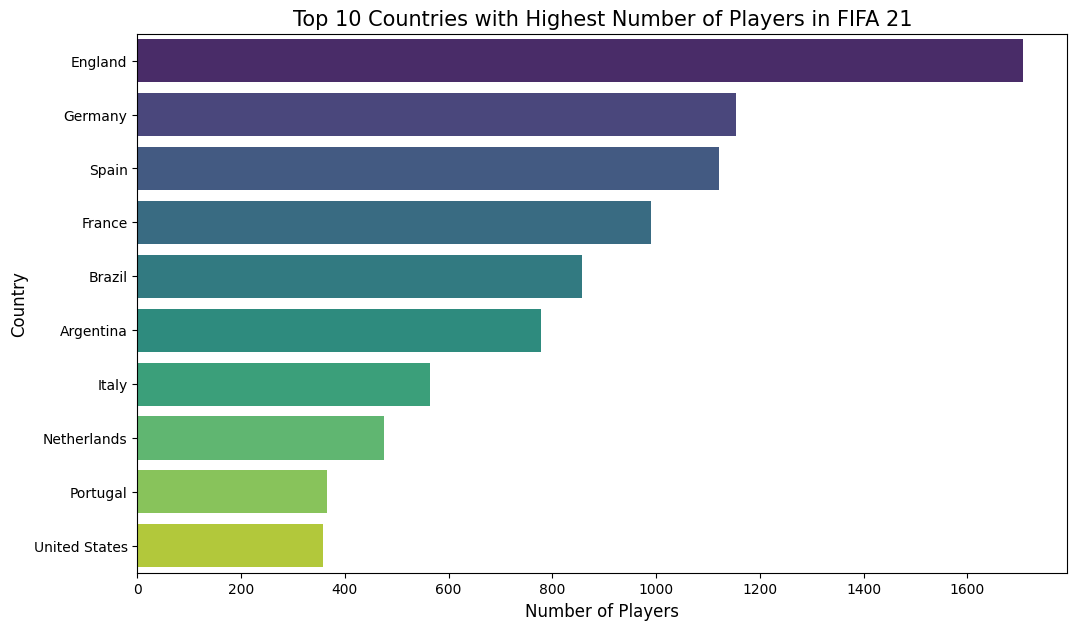

In [7]:
# Top 10 countries with highest number of players
top_countries = fifa_data['Nationality'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title('Top 10 Countries with Highest Number of Players in FIFA 21', fontsize=15)
plt.xlabel('Number of Players', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

가장 많은 선수가 FIFA 21에 포함된 클럽

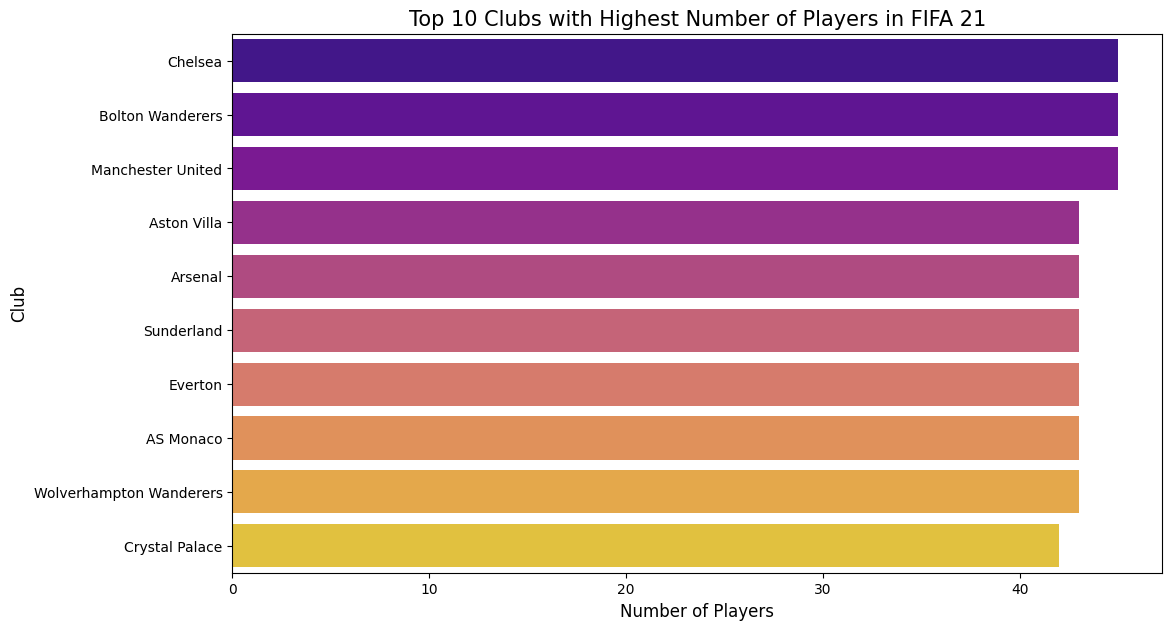

In [8]:
# Top 10 clubs with highest number of players
top_clubs = fifa_data['Club'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(y=top_clubs.index, x=top_clubs.values, palette='plasma')
plt.title('Top 10 Clubs with Highest Number of Players in FIFA 21', fontsize=15)
plt.xlabel('Number of Players', fontsize=12)
plt.ylabel('Club', fontsize=12)
plt.show()

선수들의 나이 분포

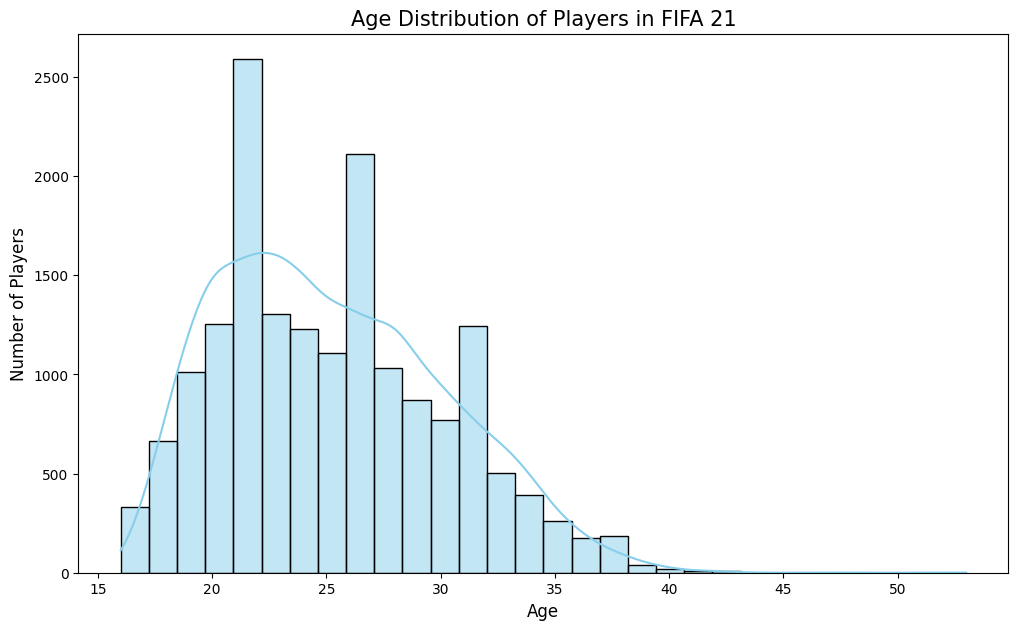

In [9]:
# Age distribution of players
plt.figure(figsize=(12, 7))
sns.histplot(fifa_data['Age'], bins=30, color='skyblue', kde=True)
plt.title('Age Distribution of Players in FIFA 21', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.show()

전체 OVA(Overall) 점수 분포

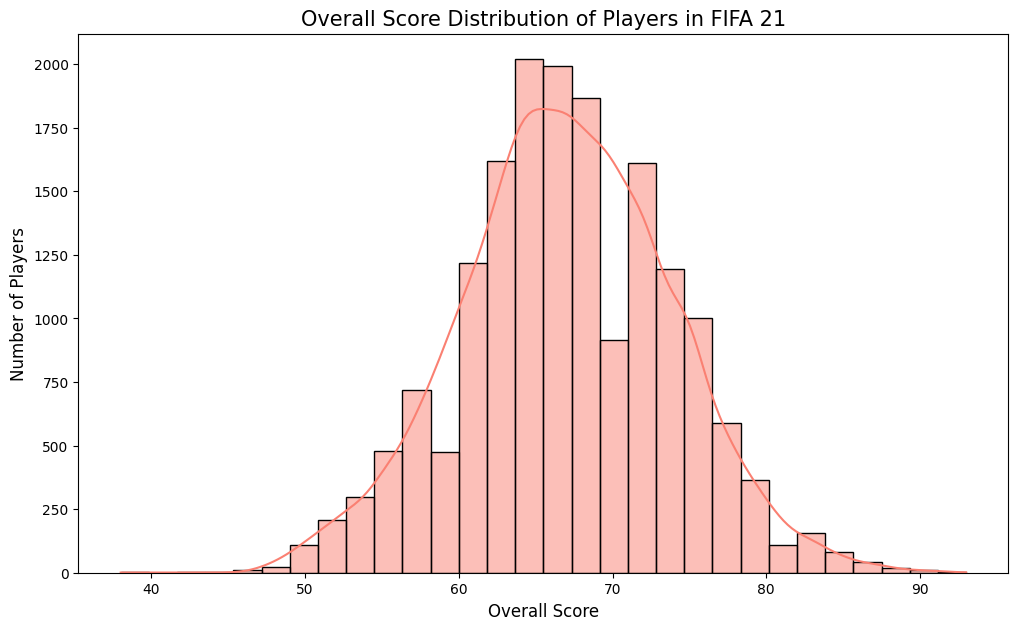

In [10]:
# Overall score distribution of players
plt.figure(figsize=(12, 7))
sns.histplot(fifa_data['OVA'], bins=30, color='salmon', kde=True)
plt.title('Overall Score Distribution of Players in FIFA 21', fontsize=15)
plt.xlabel('Overall Score', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.show()

포지션별로 평균 OVA 점수 비교

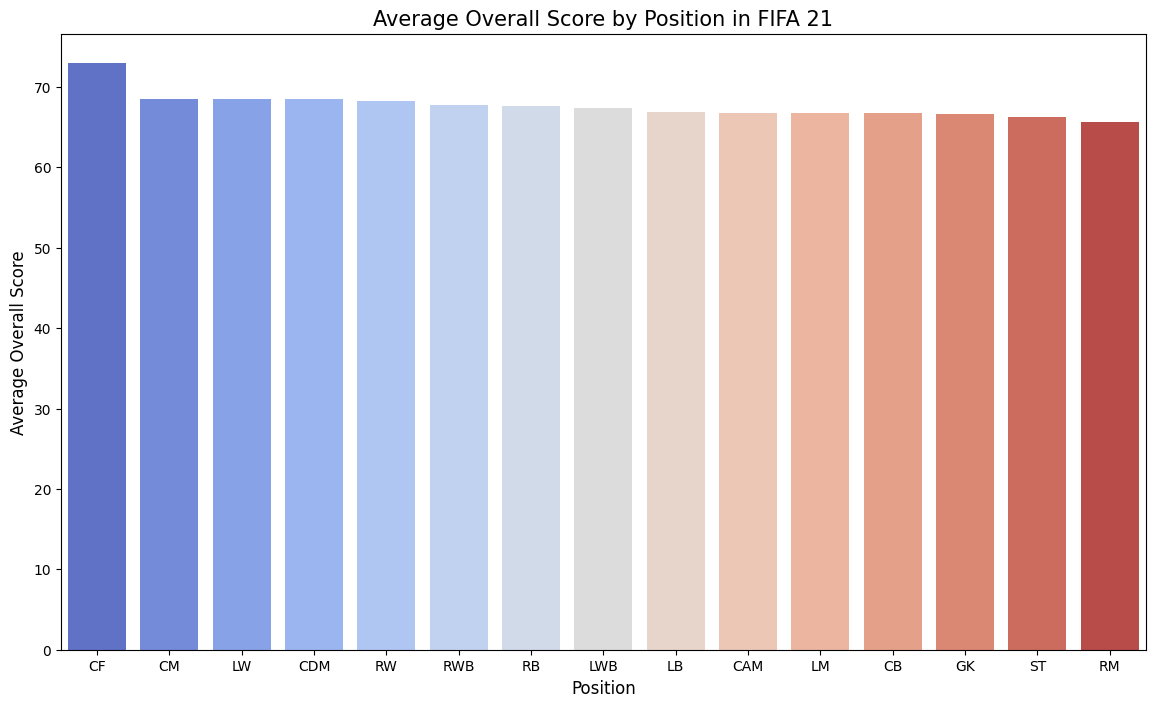

In [11]:
# Calculate average OVA score for each position
position_ova = fifa_data.groupby('BP')['OVA'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=position_ova.index, y=position_ova.values, palette='coolwarm')
plt.title('Average Overall Score by Position in FIFA 21', fontsize=15)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Average Overall Score', fontsize=12)
plt.show()

# 데이터 분석

연령대별 선수의 성능 분석

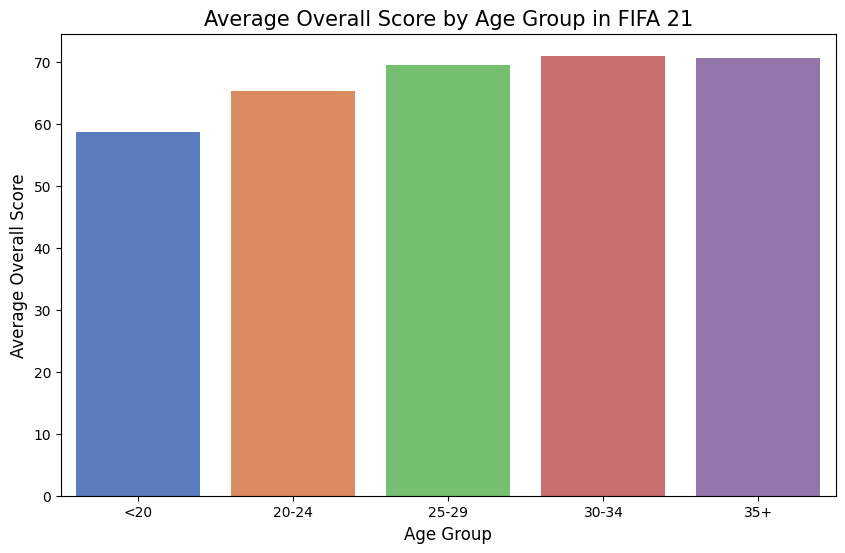

In [12]:
# Categorize players into age groups
bins = [0, 19, 24, 29, 34, 100]
labels = ['<20', '20-24', '25-29', '30-34', '35+']
fifa_data['Age Group'] = pd.cut(fifa_data['Age'], bins=bins, labels=labels, right=True)

# Calculate average OVA score for each age group
age_group_ova = fifa_data.groupby('Age Group')['OVA'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_ova.index, y=age_group_ova.values, palette='muted')
plt.title('Average Overall Score by Age Group in FIFA 21', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Overall Score', fontsize=12)
plt.show()

클럽별 선수 성능 평균 비교

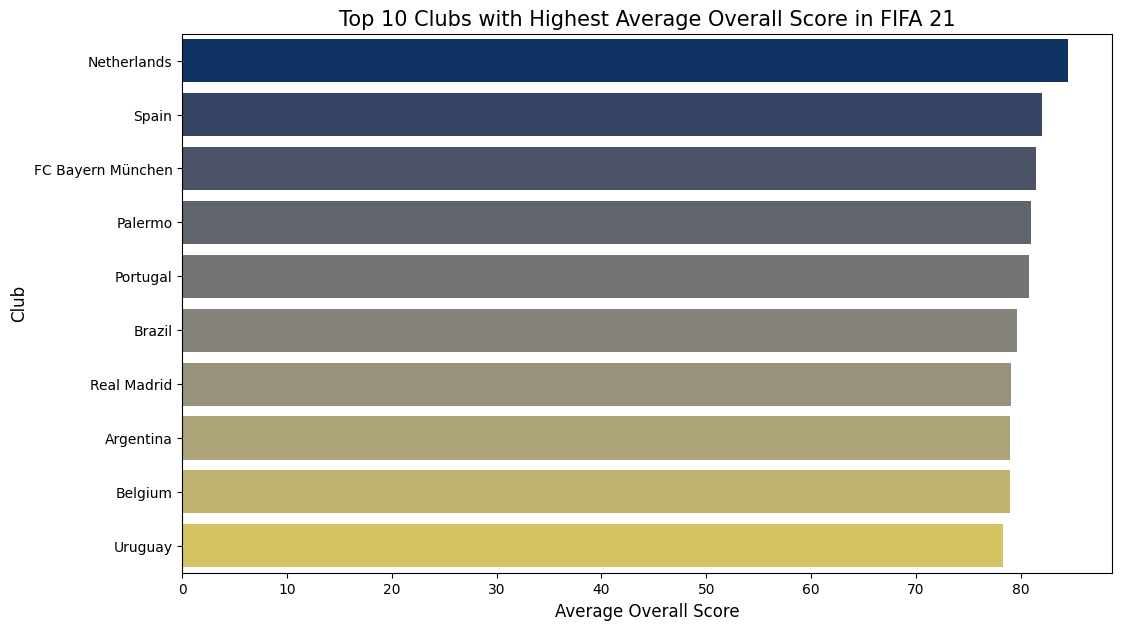

In [13]:
# Calculate average OVA score for each club
club_ova = fifa_data.groupby('Club')['OVA'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(y=club_ova.index, x=club_ova.values, palette='cividis')
plt.title('Top 10 Clubs with Highest Average Overall Score in FIFA 21', fontsize=15)
plt.xlabel('Average Overall Score', fontsize=12)
plt.ylabel('Club', fontsize=12)
plt.show()

국가별 선수 성능 평균 **비교**

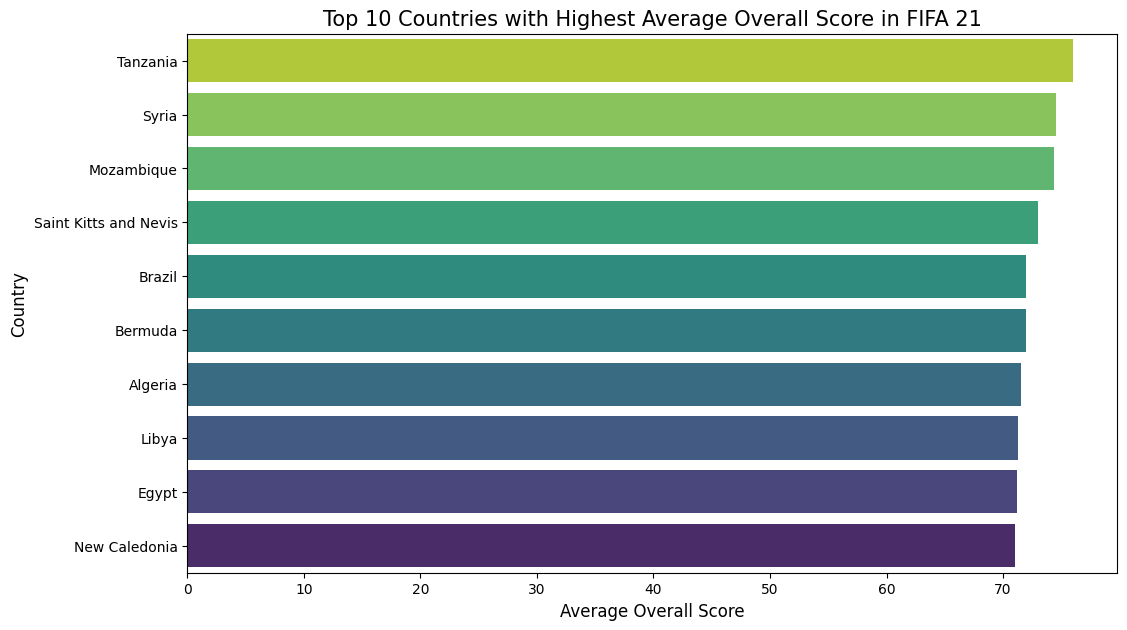

In [14]:
# Calculate average OVA score for each country
country_ova = fifa_data.groupby('Nationality')['OVA'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(y=country_ova.index, x=country_ova.values, palette='viridis_r')
plt.title('Top 10 Countries with Highest Average Overall Score in FIFA 21', fontsize=15)
plt.xlabel('Average Overall Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# 인사이트

**연령과 선수 성능의 관계**

선수의 연령대가 증가함에 따라 평균 성능 점수가 감소하는 경향이 있습니다. 이는 선수의 체력이나 속도 등의 능력치가 나이와 함께 감소하기 때문일 수 있습니다. 팀 구성 시, 젊은 선수와 경험 많은 선수의 균형을 맞추는 것이 중요할 것입니다.

**클럽의 선수 평균 성능**

일부 유명 클럽들은 높은 평균 성능의 선수들을 보유하고 있습니다. 이는 해당 클럽들이 높은 예산과 스카우팅 능력을 가지고 있어, 우수한 선수들을 영입할 수 있기 때문일 것입니다. 이런 클럽들과 경기할 때는 전략을 잘 세워야 합니다.

**국가별 선수 평균 성능**

일부 국가들은 높은 평균 성능의 선수들을 배출하고 있습니다. 이는 그 국가의 축구 발달 수준, 유소년 트레이닝 시스템, 리그 구조 등이 뛰어나기 때문일 수 있습니다. 국제 대회에서의 해당 국가의 선수들을 주시해야 할 것입니다.

**데이터 분석의 활용 범위**

이러한 분석은 게임 내에서만의 활용이 아닙니다. 스포츠 분석, 스카우팅, 선수 영입 전략 등 실제 축구 세계에서도 유용하게 사용될 수 있습니다. 데이터 기반의 의사결정은 팀의 성공에 크게 기여할 수 있습니다.